In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder, normalize

In [4]:
df1 = pd.read_excel(r'seismic_data.xlsx', engine='openpyxl')
df1 = df1.drop(['Column1'], axis=1)
df1

,Date,Time,Distance (KM),Depth (km),Eartquake_Origin,Magnitude (ML),Year
0,2022-01-06,20:46:00,13,10,"Daphu, Chhukha, Bhutan",4.1,2022
1,2022-11-07,22:20:00,19,10,"Gangtok, Sikkim, India",4.6,2021
2,2022-07-25,21:09:00,20,10,"Namchi, Sikkim, India",4.5,2021
3,2022-07-09,13:46:00,11,10,"Lakhipur, Assam, India",4.3,2021
4,2022-07-07,21:15:00,7,10,"Lakhipur, Assam, India",5.3,2021
...,...,...,...,...,...,...,...
130,2022-09-01,19:22:00,28,15,"Udalpur,Assam,India",5.8,1964
131,2022-06-21,21:26:00,19,51,"Karimagang,Assam,India",5.7,1963
132,2022-06-19,16:47:00,19,45,"Sylhet,Bangladesh",5.6,1963
133,2022-07-29,16:42:00,9,15,"Kokrajhar,Assam, India",5.6,1960


In [6]:
df2 = df1.loc[df1['Magnitude (ML)'] >=5]
df2

,Date,Time,Distance (KM),Depth (km),Eartquake_Origin,Magnitude (ML),Year
4,2022-07-07,21:15:00,7,10,"Lakhipur, Assam, India",5.3,2021
6,2022-04-05,21:19:00,33,18,"Samtse, Samchi, Bhutan",5.0,2021
11,2022-03-20,07:33:00,87,10,"Lobujya, Eastern Region, Nepal",5.7,2020
13,2022-09-12,10:50:00,8,10,"Sapatgram, Assam, India",5.3,2018
19,2022-01-03,15:09:00,17,36,"Ambasa, Tripura, India",5.5,2017
21,2022-04-05,07:42:00,35,3,"Lakhipur, Assam, India",5.0,2016
28,2022-05-16,17:34:00,45,7,"Kothari, Nepal",5.5,2015
29,2022-05-12,13:36:00,42,15,"Kothari, Nepal",6.3,2015
30,2022-05-12,13:17:00,37,13,"Kothari, Nepal",5.5,2015
31,2022-05-12,13:05:00,19,15,"Kothari, Nepal",7.3,2015


In [9]:
df3 = df2.groupby(['Year'], as_index=False).mean()
df3 = df3[['Year','Magnitude (ML)']]
df3

,Year,Magnitude (ML)
0,1960,5.600000
1,1963,5.650000
2,1964,5.800000
3,1965,5.900000
4,1967,5.800000
5,1974,5.700000
6,1979,5.100000
7,1980,6.100000
8,1981,5.100000
9,1982,5.100000


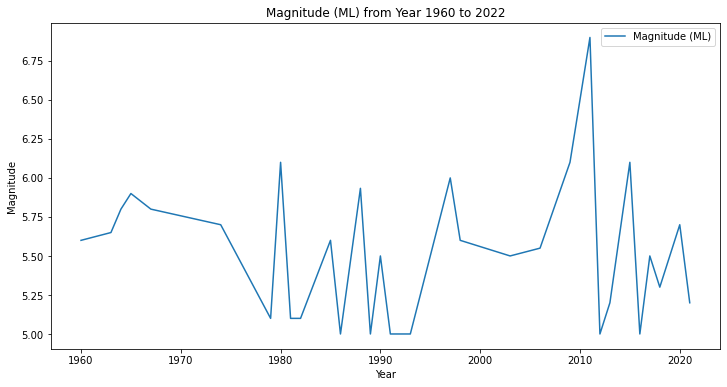

In [10]:
df3.plot(x="Year", y=["Magnitude (ML)"], kind="line", figsize=(12,6))
plt.title("Magnitude (ML) from Year 1960 to 2022")
plt.ylabel('Magnitude')
plt.savefig(f"Images/YearVsMagnitude.jpg")
# plt.grid()
plt.show()

In [11]:
data_plot = df3

C:\Users\Shourov\AppData\Local\Temp/ipykernel_8488/3904499264.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_mag_df['Event'] = event


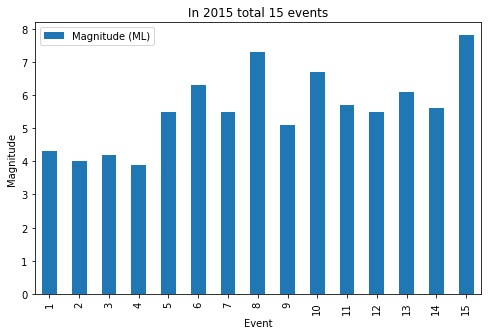

In [12]:
# 2009, 1988, 2011, 2015 most magnitude
year_to_show = 2015
count = df1['Year'].value_counts()[year_to_show]
event = list(range(1,count+1))
most_mag_df = df1.loc[df1['Year'] == year_to_show]
most_mag_df['Event'] = event
# most_mag_df
most_mag_df.plot(x="Event", y=["Magnitude (ML)"], kind="bar", figsize=(8,5) )
plt.title(f'In {year_to_show} total {count} events')
plt.ylabel('Magnitude')
plt.savefig(f"MagVsEvent{year_to_show}.jpg")
# plt.grid()
plt.show()

In [13]:
X = data_plot.drop(['Magnitude (ML)'], axis='columns')
X

,Year
0,1960
1,1963
2,1964
3,1965
4,1967
5,1974
6,1979
7,1980
8,1981
9,1982


In [14]:
y = data_plot['Magnitude (ML)']
y = pd.DataFrame(y)
y

,Magnitude (ML)
0,5.600000
1,5.650000
2,5.800000
3,5.900000
4,5.800000
5,5.700000
6,5.100000
7,6.100000
8,5.100000
9,5.100000


In [19]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

In [20]:
test_ratio = 0.15

# Generate TrainX and TrainY
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= test_ratio)

In [21]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(input_shape,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1))

In [23]:
model.compile(loss='mse',
              optimizer='rmsprop',
              metrics=['mae'])

In [24]:
history = model.fit(X_train, y_train,
                    steps_per_epoch=200,
                    epochs=100,
                    batch_size=n_batch_size)


In [3]:
accuracy = model.score(X_test, y_test)
accuracy

0.5923

In [18]:
X_pred = list(range(2022,2122))
X_pred

[2022,
 2023,
 2024,
 2025,
 2026,
 2027,
 2028,
 2029,
 2030,
 2031,
 2032,
 2033,
 2034,
 2035,
 2036,
 2037,
 2038,
 2039,
 2040,
 2041,
 2042,
 2043,
 2044,
 2045,
 2046,
 2047,
 2048,
 2049,
 2050,
 2051,
 2052,
 2053,
 2054,
 2055,
 2056,
 2057,
 2058,
 2059,
 2060,
 2061,
 2062,
 2063,
 2064,
 2065,
 2066,
 2067,
 2068,
 2069,
 2070,
 2071,
 2072,
 2073,
 2074,
 2075,
 2076,
 2077,
 2078,
 2079,
 2080,
 2081,
 2082,
 2083,
 2084,
 2085,
 2086,
 2087,
 2088,
 2089,
 2090,
 2091,
 2092,
 2093,
 2094,
 2095,
 2096,
 2097,
 2098,
 2099,
 2100,
 2101,
 2102,
 2103,
 2104,
 2105,
 2106,
 2107,
 2108,
 2109,
 2110,
 2111,
 2112,
 2113,
 2114,
 2115,
 2116,
 2117,
 2118,
 2119,
 2120,
 2121]

In [27]:
y_pred = model.predict(X_pred)
y_pred

[5.3471248833626674,
 6.221305544506084,
 5.708824264176533,
 5.958000212800876,
 5.633565651239053,
 5.742451645512797,
 5.483839355660813,
 6.263049699664185,
 5.860390727910804,
 6.085471935872794,
 6.102223219913912,
 7.055065637722349,
 5.79164992577913,
 5.59720816360403,
 5.832247986705241,
 5.798363340654326,
 5.53671345432636,
 5.61643701574782,
 6.301384099177554,
 5.361012743749981,
 5.280720916149356,
 7.857912765164279,
 5.534207326002886,
 5.340090416543736,
 5.781896797051439,
 5.76783909896971,
 5.891143541980086,
 5.854574563681866,
 5.517959041065596,
 5.423302162569279,
 5.542278588980886,
 6.314396303871583,
 6.011745450559865,
 6.230858626720804,
 7.667814334570729,
 5.689304643432807,
 5.731458142802149,
 5.753468150974713,
 5.974091326926592,
 5.914285106888579,
 6.811837660881894,
 6.036179661364864,
 6.052984018356421,
 6.062834642766882,
 5.26327320930544,
 6.93638500373112,
 6.173658922424886,
 6.150825185353968,
 5.235439425162775,
 5.4849457630197405,
 5.66

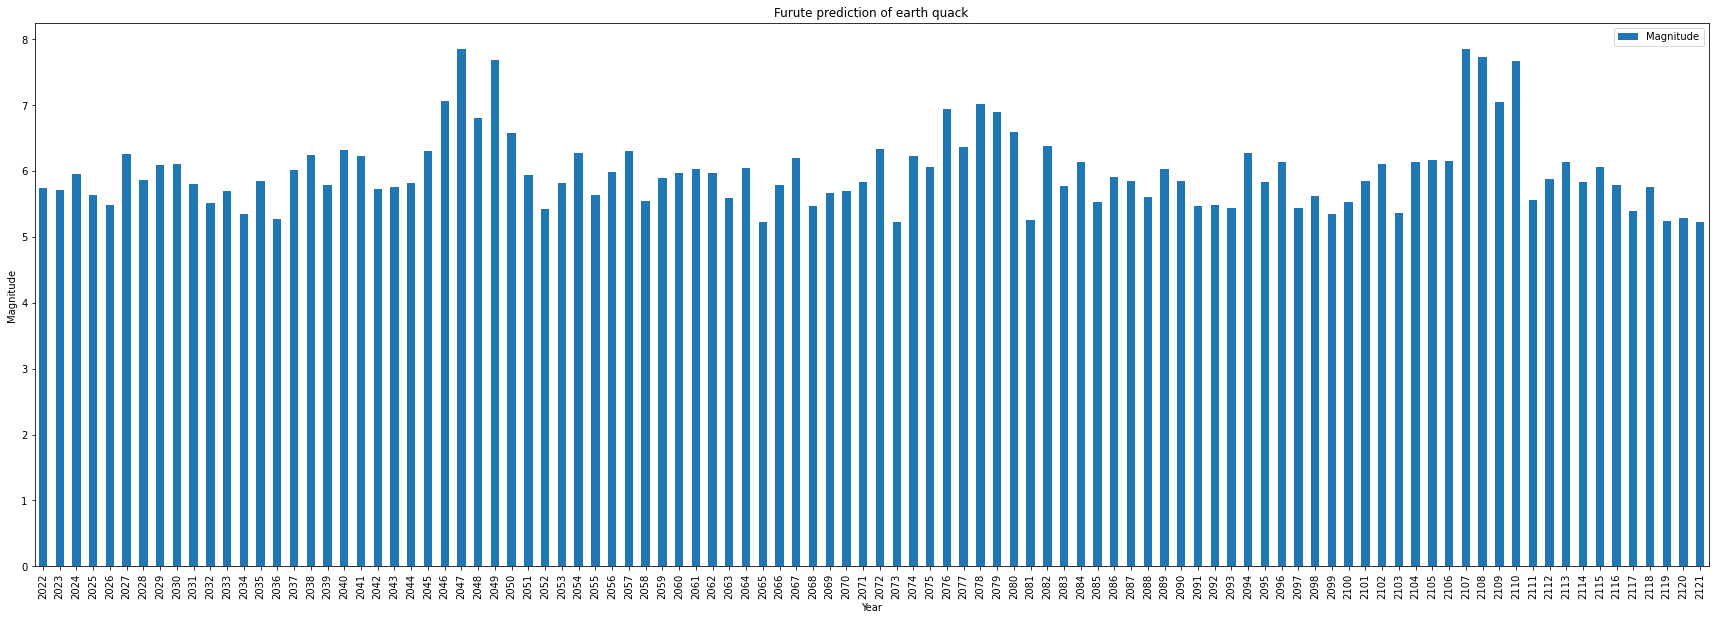

In [44]:
data_plot = y_pred
data_plot.plot(x="Year", y=["Magnitude"], kind="bar", figsize=(30,10))
plt.title('Furute prediction of earth quack')
plt.ylabel('Magnitude')
plt.savefig(f"Images/Future_prediction2(bar).jpg")
plt.show()

In [15]:
d = {'Year':X_pred,'Magnitude':y_pred}
df_pred = pd.DataFrame(d)
df_pred.to_csv('Images/Prediction2.csv')

df_pred

,Unnamed: 0,Year,Magnitude
0,0,2022,5.742452
1,1,2023,5.708824
2,2,2024,5.958000
3,3,2025,5.633566
4,4,2026,5.483839
...,...,...,...
95,95,2117,5.397838
96,96,2118,5.757840
97,97,2119,5.235439
98,98,2120,5.280721
